# Statistics

<!-- SUMMARY: This script gives the information of Basic Statistics.  -->

<!-- CATEGORY: Courses -->

This file gives the elementary information on calculation of basic Statistics.

In [1]:
import gstlearn.document as gdoc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gstlearn as gl 
from IPython.display import Markdown

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

We will illustrate the notions on the Scotland temperatures data set.

In [2]:
data = pd.read_csv(gdoc.loadData("Scotland", "Scotland_Temperatures.csv"))
data

,Longitude,Latitude,Elevation,January_temp
0,372.1,658.9,255,1.7
1,303.5,665.9,125,2
2,218.4,597.9,8,4.6
3,245.0,955.0,90,MISS
4,326.8,691.2,32,3.1
...,...,...,...,...
231,273.2,564.6,47,2.8
232,333.9,730.1,30,2.6
233,185.0,655.0,115,MISS
234,259.8,587.9,119,2.1


In [3]:
z = data["Elevation"].to_numpy()

### 1) Position

In [4]:
Markdown(gdoc.loadDoc("Statistics_mean.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Mean

$$\bar{z} = \frac{1}{n}\sum_{i=1}^n z_i$$

</md-block>

In [5]:
m = np.mean(z)
rounded = np.round(m,decimals=2)
print("Mean = " + str(rounded))

Mean = 146.44


In [6]:
Markdown(gdoc.loadDoc("Statistics_median.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Median

The median $m$ of the set of values is a value such as half of the total observations are below and half is above.

* If the size $n$ is odd, it is the value of the $z_{\left(\frac{n+1}{2}\right)}$ where $z_{(i)}$ is the value of the $i$ th observation (when ordered in increasing order).

* If $n$ is even, we can take $\frac{z_{\left(\frac{n}{2}\right)}+z_{\left(\frac{n}{2}+1\right)}}{2}$.

The median is less sensitive than the mean to extreme values.

</md-block>

In [7]:
print("Median = " + str(np.median(z)))

Median = 85.5


In [8]:
Markdown(gdoc.loadDoc("Statistics_quartiles.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Quartiles

The quartiles are the values which divide the samples as follows:

* lower quartile: 25\% of the individuals are below
* upper quartile: 25\% of the individuals are above

</md-block>

In [9]:
print("Quartiles = " + str(np.quantile(z,[0,0.25,0.5,0.75,1])))

Quartiles = [  2.    28.5   85.5  216.25 800.  ]


In [10]:
Markdown(gdoc.loadDoc("Statistics_quantiles.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
####  Quantiles (p)

We can generalize to any proportion $p$.

The $p-$quantile denoted $q_p$ is a value which divides the samples such as a proportion $p$ of the individuals are below the quantile. 

The median is $q_{\frac{1}{2}}$. The lower quartile is $q_{\frac{1}{4}}$ and the upper quartile is $q_{\frac{3}{4}}$.

</md-block>

### 2) Dispersion

In [11]:
Markdown(gdoc.loadDoc("Statistics_range.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Range

$$\max_{i=1,\dots,n}{z_i}-\min_{i=1,\dots,n}{z_i}$$

</md-block>

In [12]:
print("Range= " + str(np.max(z)-np.min(z)))

Range= 798


In [13]:
Markdown(gdoc.loadDoc("Statistics_interq.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Inter-quartiles distance

$$q_{\frac{3}{4}}-q_{\frac{1}{4}}$$

</md-block>

In [14]:
print("Inter-quartiles distance = " + str(np.diff(np.quantile(z,[0.25,0.75]))))

Inter-quartiles distance = [187.75]


In [15]:
Markdown(gdoc.loadDoc("Statistics_variance.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Variance 

The variance measures the average distance between each individual to the mean:

$$\frac{1}{n}\sum_{i=1}^n(z_i-\bar{z})^2$$

It is sometimes more convenient to use the equivalent formula


$$\frac{1}{n}\sum_{i=1}^nz_i^2-\bar{z}^2 = \bar{z^2}-\bar{z}^2$$

Note that for statistical reasons, one often prefers to use

$$\frac{1}{n-1}\sum_{i=1}^n(z_i-m)^2$$

for the variance. The two formulas give close results when $n$ is large.

</md-block>

In [16]:
# Variance
n = len(z)
print("Variance (First formula) = " + str(np.mean((z-np.mean(z))**2)))
print("Variance (Sec.  formula) = " + str(np.mean(z**2)-np.mean(z)**2))
print("Variance (numpy version) = " + str(np.var(z)))

Variance (First formula) = 27270.71258259121
Variance (Sec.  formula) = 27270.712582591204
Variance (numpy version) = 27270.71258259121


In [17]:
Markdown(gdoc.loadDoc("Statistics_std.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Standard Deviation


To have a measure in the same unit as the variable, one often consider the standard deviation.

$$\sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\bar{z})^2}$$

</md-block>

In [18]:
print("Variance (numpy version) = " + str(np.std(z)))

Variance (numpy version) = 165.13846487899545


### 3) Distribution

In [19]:
Markdown(gdoc.loadDoc("Statistics_histo.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Histogram

To have a good idea of the distribution of a variable, one can compute the histogram.

The idea is 

* divide the range of the variable $[min,Max]$ into small intervals. Here, we only treat the case were all intervals have the same size
* compute the number of samples in each interval.


Normalized histogram rescales the ordinate such as the total surface is equal to 1.

</md-block>

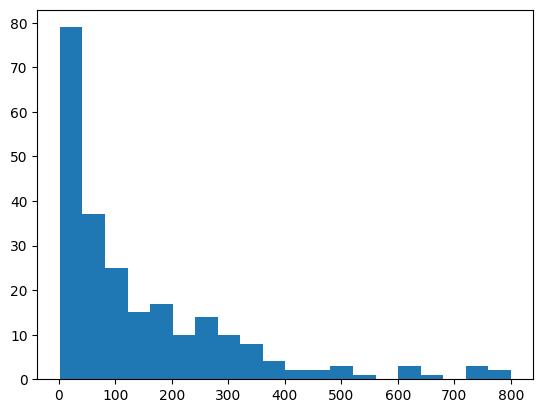

In [20]:
nbin = 20
ax = plt.hist(z,bins=nbin)

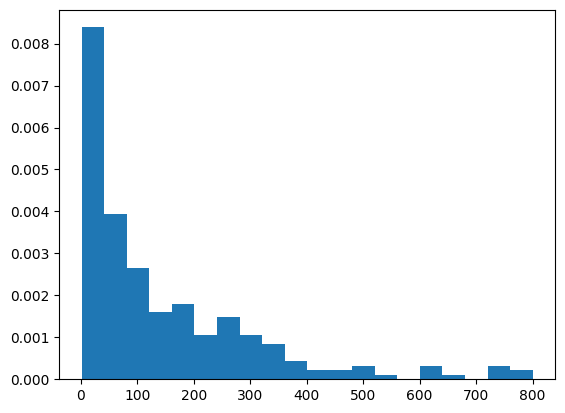

In [21]:
#Histogram (normalized)
ax = plt.hist(z,bins=nbin,density=True)

In [22]:
Markdown(gdoc.loadDoc("Statistics_histocum.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Cumulated histogram

We can represent the cumulated histogram. It is a function which computes, for each value, the proportion of individuals below this value. 
It can be written as 
    
   $$F(z_c) =\frac{1}{n}\sum_{i=1}^n 1\!\!\!1_{]z_{i},+\infty]}(z_c)$$
   
   where $1\!\!\!1_A$ is the indicator function of the set $A$:
   
   $$1\!\!\!1_A(x)=\left\{\begin{array}{ccc}1 &\textrm{ if } & x\in A\\
   0 & \textrm{ otherwise } & \end{array}
   \right.$$


</md-block>

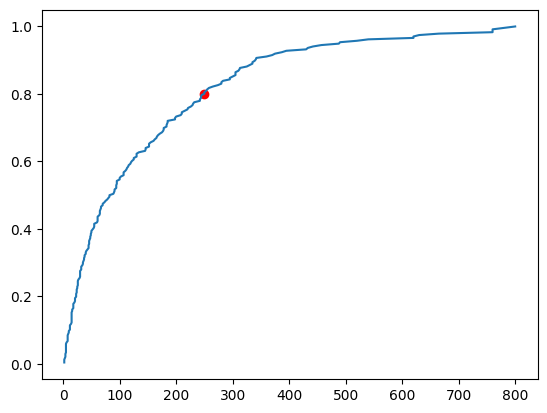

In [23]:
#Cumulative histogram
p = 0.8
x = np.sort(z)
y = np.linspace(1/len(z),1,len(x))
a = plt.plot(x, y)
a = plt.scatter(np.quantile(z,p),p,c="r")

In [24]:
Markdown(gdoc.loadDoc("Statistics_quantileF.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Quantile function

If we inverse the two axes, we obtain the quantile function which gives, for each value $p$, the quantile $q_p$.

$$q(p) = F^{-1}(p)$$

</md-block>

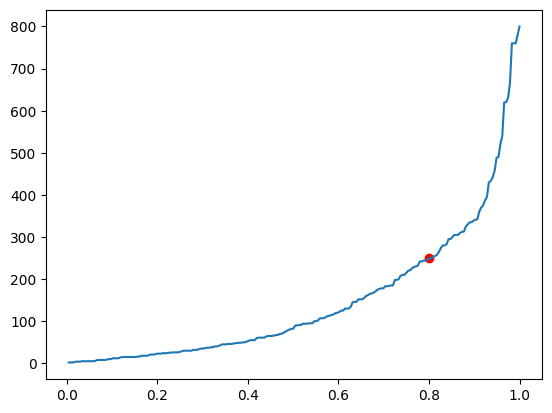

In [25]:
#Quantile function
p = 0.8
plt.plot(y,x)
a = plt.scatter(p,np.quantile(z,p),c="r")

In [26]:
Markdown(gdoc.loadDoc("Statistics_Ore.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Ore

In mine, we often consider the ore function 
$$T(z_c) = 1-F(z_c)$$

Indeed, it gives the proportion of the data which are above a cut-off.

</md-block>

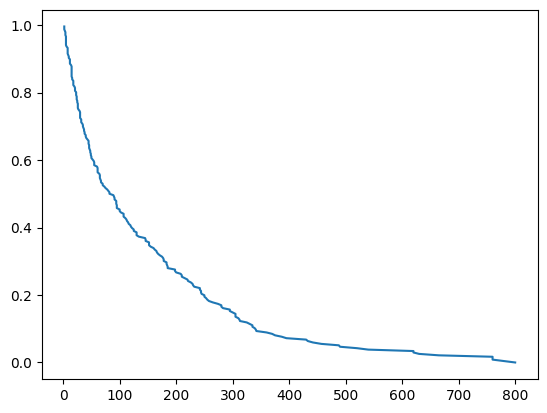

In [27]:
#Ore
ore = 1. - y
a = plt.plot(x,ore)

In [28]:
Markdown(gdoc.loadDoc("Statistics_Metal.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Metal

$$Q(z_c) =\frac{1}{n}\sum_{i=1}^n z_i1\!\!\!1_{]z_{i},+\infty]}(z_c)$$

</md-block>

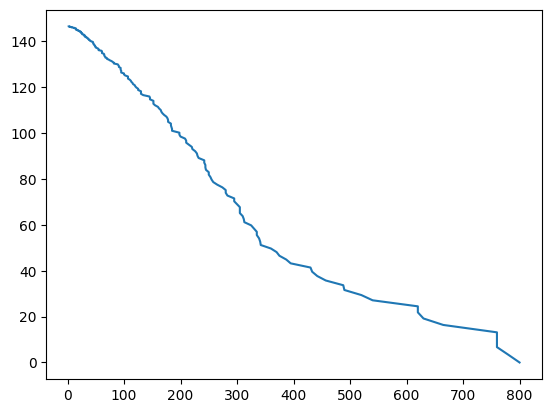

In [29]:
#Metal (normalized)
metal = 1/len(x)*(np.sum(x)-np.cumsum(x))
a = plt.plot(x, metal)

In [30]:
Markdown(gdoc.loadDoc("Statistics_Grade.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Grade 

$$m(z_c)=\frac{Q(z_c)}{T(z_c)}$$

</md-block>

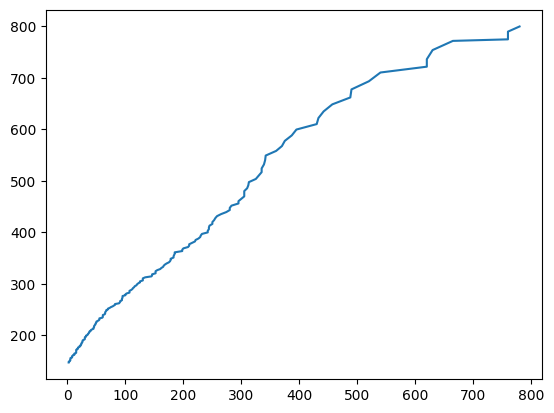

In [31]:
#Grade
a = plt.plot(x[:-1],metal[:-1]/ore[:-1])

In [32]:
Markdown(gdoc.loadDoc("Statistics_QT.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### $Q(T)$ curve

We just represent the **Metal** with respect to the **Ore** for various cut-off values $z_c$.

</md-block>

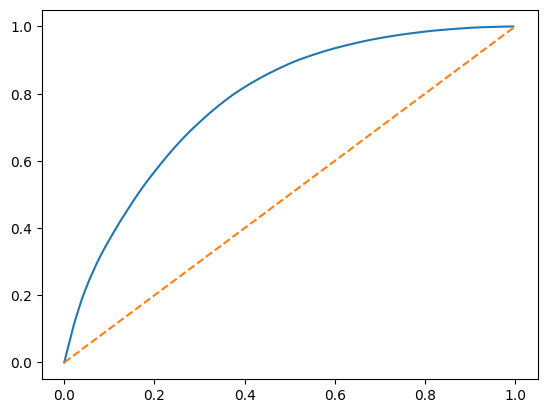

In [33]:
#Q(T) curve
a = plt.plot(ore, metal/metal[0])
a = plt.plot([0,1],[0,1],"--")

In [34]:
Markdown(gdoc.loadDoc("Statistics_Benefit.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Conventional benefit

$$B(z_c) = Q(z_c)-z_cT(z_c)$$

</md-block>

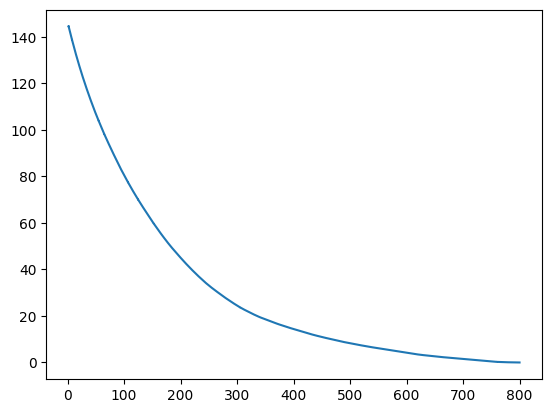

In [35]:
#Benefit
a = plt.plot(x,metal-x*ore)

### 4) Bivariate Statistics

In [36]:
Markdown(gdoc.loadDoc("Statistics_Bivariate.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
Now we consider two variables:

* $z^{(1)}=(z_1^{(1)},\dots,z_n^{(1)})$
* $z^{(2)}=(z_1^{(2)},\dots,z_n^{(2)})$

and we will study their relationship.

</md-block>

In [37]:
temp = data["January_temp"].to_numpy()
elev = data["Elevation"].to_numpy()
sel = temp!="MISS"
z2=temp[sel].astype("float")
z1=elev[sel]

In [38]:
Markdown(gdoc.loadDoc("Statistics_Covariance.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Covariance

We can compute the covariance between the two vectors $z^{(1)}$ and  $z^{(2)}$.

$$\textrm{cov}(z^{(1)},z^{(2)}) = \frac{1}{n}\sum_{i=1}^n (z^{(1)}_i-\bar{z}^{(1)})(z^{(2)}_i-\bar{z}^{(2)})$$

where $\bar{z}^{(j)}$ is the mean of the variable $z^{(j)}$ with $j=1,2$.

</md-block>

In [39]:
# Covariance
print("Covariance = " + str(np.cov(z1,z2)[0,1]))

Covariance = -72.91027814569537


In [40]:
Markdown(gdoc.loadDoc("Statistics_Correlation.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Correlation coefficient

The covariance depends on the scale of $z^{(1)}$ and $z^{(2)}$. In order to have a scale invariant measure, we can use the correlation coefficient 
$$\rho = \frac{\textrm{cov}(z^{(1)},z^{(2)})}{\sqrt{\textrm{var}(z^{(1)})\textrm{var}(z^{(2)})}}$$

The correlation coefficient lies within $[-1,1]$.

When it is equal to $-1$ or $1$, the variables are linked by a linear relationship

$$z^{(2)}=a.z^{(1)}+b$$

where the sign of $a$ corresponds to the sign of $\rho$.

When $\rho=0$, we say that the variables are uncorrelated. But they can still have a link (not linear).

</md-block>

In [41]:
print("Correlation coefficient",np.corrcoef(z1,z2)[0,1])

Correlation coefficient -0.8023409668442096


In [42]:
Markdown(gdoc.loadDoc("Statistics_CovarianceM.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Covariance matrix

When we have several variables $z^{(1)},\dots,z^{(p)}$, we can compute their covariance matrix $\Sigma$ which stores the covariances between each pair of variable.

$$\Sigma = \left[
\begin{array}{cccc}
\textrm{var}(z^{(1)})         & \textrm{cov}(z^{(1)},z^{(2)}) &\dots  & \textrm{cov}(z^{(1)},z^{(p)})\\
\textrm{cov}(z^{(2)},z^{(1)}) & \textrm{var}(z^{(2)})         & \dots & \textrm{cov}(z^{(2)},z^{(p)})\\
\vdots & \vdots & \ddots & \vdots \\
\textrm{cov}(z^{(p)},z^{(1)}) &  \textrm{cov}(z^{(p)},z^{(2)})&\dots  & \textrm{var}(z^{(p)})\\
\end{array}\right]$$

Note that this matrix is symmetric.

If the variables (centered by their means) are stored in a matrix $Z_c$ (one column per variable), then 

$$\Sigma = \frac{1}{n} Z_c^TZ_c$$ where $^T$ designates the transposition.

In other words, $Z_c^T$ is the matrix where each line is a variable.

</md-block>

In [43]:
#Covariance matrix
print("Covariance matrix = \n" + str(np.cov(z1,z2)))

Covariance matrix = 
[[ 8.04385263e+03 -7.29102781e+01]
 [-7.29102781e+01  1.02658631e+00]]


In [44]:
print("Variance",np.var(z1) * len(z1)/(len(z1)-1))

Variance 8043.852626931566


In [45]:
print("Covariance matrix = \n" + str(np.cov(z1,z2,bias=True)))

Covariance matrix = 
[[ 7.99058208e+03 -7.24274286e+01]
 [-7.24274286e+01  1.01978773e+00]]


In [46]:
Markdown(gdoc.loadDoc("Statistics_Scatter.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Scatter plot

We can represent the scatter plot between the two variables (only isotopic samples are represented).

</md-block>

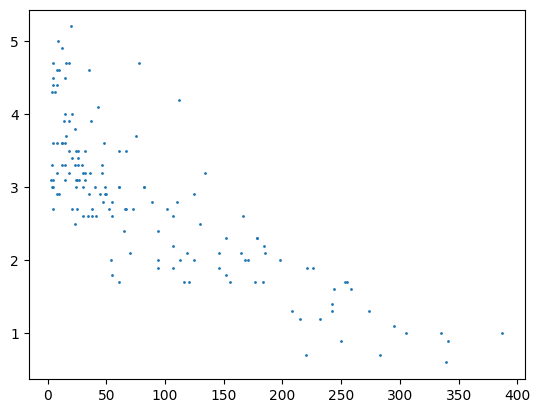

In [47]:
a = plt.scatter(z1,z2,s=1)

In [48]:
Markdown(gdoc.loadDoc("Statistics_Regr.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
Here the relation could be considered as linear. Let's try to find the coefficents of the regression line.

### Linear regression

#### Simple linear regression

We can model the relationship between $z^{(1)}$ and $z^{(2)}$ by using a linear regression.
 model 
$$z^{(2)}=az^{(1)}+b + R$$ where $R$ is a residual.

We try to find $(a,b)$ by minimizing the sum of the squared difference between $z^{(2)}$ and $az^{(1)}+b$: 

$$||R||^2 =\sum_{i=1}^n(z^{(2)}_i - (az^{(1)}_i+b))^2.$$

We can show that the coefficients $a$ and $b$ can be estimated by

$$\hat a = \frac{\textrm{cov}(z^{(1)},z^{(2)})}{\textrm{var}(z^{(1)})}$$

and $b$ by 

$$\hat b = \bar{z}^{(2)}-\hat a\bar{z}^{(1)}$$

</md-block>

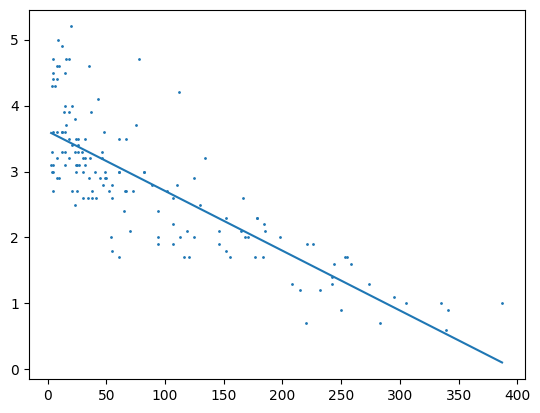

In [49]:
# Regression 
ahat = np.cov(z1,z2,bias=True)[1,:][0]/np.var(z1)
bhat = np.mean(z2) - ahat*np.mean(z1)
plt.scatter(z1,z2,s=1)
a = plt.plot([np.min(z1),np.max(z1)],[bhat+ahat*np.min(z1),bhat+ahat*np.max(z1)])

In [50]:
Markdown(gdoc.loadDoc("Statistics_MRegr.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Multiple linear regression

When we have several variables $x^{(1)},\dots,x^{(p)}$ to explain an interest variable $y$ we can also use a linear regression

$$y=\sum_{j=1}^p \beta_j x^{(j)} + \beta_0 + R$$

Note that for convenience, we will rewrite the relation 

$$y=\sum_{j=0}^p \beta_j x^{(j)}+R$$ 

where the variable $x^{(0)}$ is equal to $1$.

Last, we can rewrite more compactly

$$y = \beta^T X +R$$

where $$\beta = \left[\begin{array}{c}\beta_0 \\ \vdots \\ \beta_p\end{array}\right]$$

and $X$ is the table with all the observations. The first column contains $1$'s and then each column is a variable 
$$X  = \left[\begin{array}{cccc} 1 & x^{(1)} & \dots & x^{(p)}\end{array}\right]$$

As in the simple linear regression case, we will try to minimize

$$||R||^2=||y-\beta^TX||^2$$

We can show that 

$$\hat\beta = (X^TX)^{-1}X^Ty$$

</md-block>

In [51]:
Markdown(gdoc.loadDoc("Statistics_hist2d.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Bivariate histogram

To represent the two variables, we can perform a 2d histogram.

</md-block>

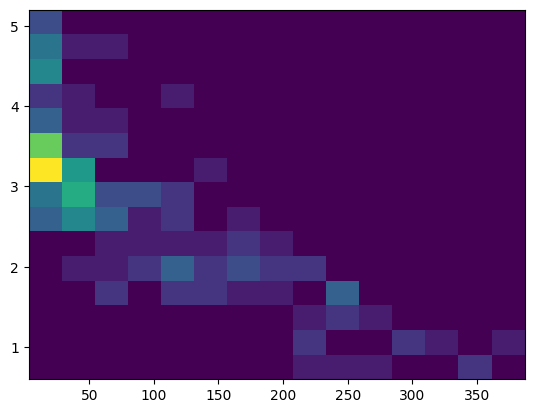

In [58]:
# 2d histogram
nbin = 15
ax = plt.hist2d(z1,z2,nbin)

In [62]:
Markdown(gdoc.loadDoc("Statistics_histcond.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
### Conditional distribution

Then we could look at the histogram of $z_2$ for a given class of $z_1$.

For instance, if we consider the 2$^\textrm{nd}$ class, $z_1\in[28.6,54.2]$ :

It shows the (empirical) conditional distribution of $z_2$ knowing that $z_1\in[28.6,54.2]$.


</md-block>

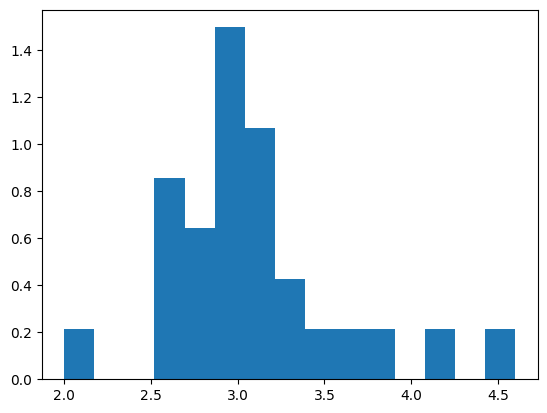

In [60]:
#Histogram in a class
axc = plt.hist(z2[np.where((z1<ax[1][2])*(z1>ax[1][1]))],bins=nbin,density=True)

In [55]:
Markdown(gdoc.loadDoc("Statistics_meancond.md"))

<style>md-block { color:gray; background-color:white; }</style><md-block>
#### Conditional mean (or regression)

In the same spirit, we can consider the conditional mean (mean of $z_2$ for a given classe of $z_1$). It is the conditional mean.

If we iterate over all the classes, we obtain the empirical regression.



</md-block>

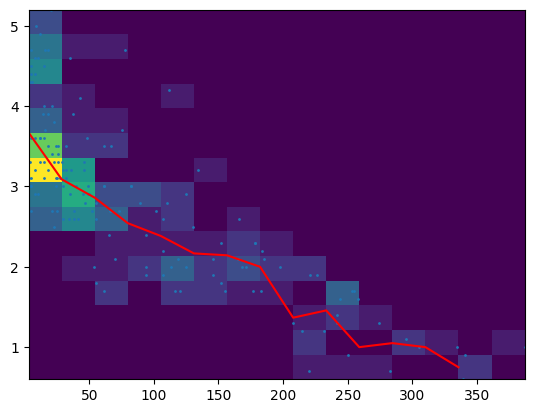

In [56]:
## Conditional mean
ax = plt.hist2d(z1,z2,15)
plt.scatter(z1,z2,s=1)
m = np.empty_like(ax[1])
for i in range(ax[1].shape[0]-1):
    ind = np.where(np.logical_and(z1>ax[1][i],z1<ax[1][i+1]))[0]
    if len(ind)>0:
        m[i] = np.mean(z2[ind])
    else:
        m[i] = None
ax=plt.plot(ax[1],m,c="r")